## Simulation of Prices of Coupon -Bearing Bonds using CIR

In [201]:
import numpy as np
import pandas as pd
import risk_ as rk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
rk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [203]:
rates, zc_prices = rk.cir(10, 500, b=0.03, r_0=0.03)

In [204]:
rk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [205]:
# bond prices at t=1 have started to diverge
rk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    110.381778
2    110.031810
3    109.006085
dtype: float64

In [206]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.027739,0.028452,0.030554
2,0.026581,0.029041,0.027765
3,0.026505,0.025743,0.028558
4,0.026528,0.025876,0.024575


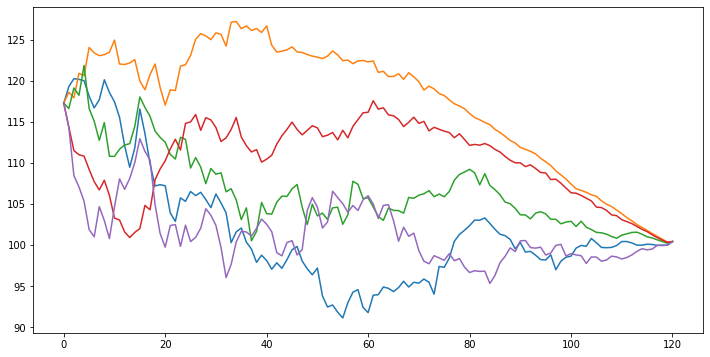

In [237]:
rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

In [248]:
prices = rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.28,118.6,116.618,114.348,114.311
2,120.246,117.909,119.114,111.49,108.433
3,120.168,120.897,118.229,110.983,107.062
4,119.995,120.613,121.857,110.813,105.323
...,...,...,...,...,...
116,100.055,101.395,100.854,101.232,99.4987
117,99.9506,101.032,100.618,100.889,99.9562
118,99.9752,100.701,100.414,100.581,99.923
119,99.9722,100.347,100.21,100.32,99.978


In [249]:
br = prices.pct_change().dropna()
rk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [260]:
p = rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,]])
btr = rk.bond_total_return(p, 100, .05, 12)
rk.annualize_rets(btr, 12)

1    0.034372
2    0.027610
3    0.031921
4    0.030302
dtype: float64

In [261]:
price_10 = rk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,100.055,101.395,100.854
117,99.9506,101.032,100.618
118,99.9752,100.701,100.414
119,99.9722,100.347,100.21
120,100.417,100.417,100.417


In [262]:
price_30 = rk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,102.153,178.598,141.307
117,97.5097,176.762,139.387
118,98.1236,178.424,139.372
119,95.8751,176.9,139.913
120,96.9579,177.972,138.915


In [263]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,145.219,143.371,138.1
2,148.205,141.792,145.07
3,148.319,150.383,142.946
4,148.169,149.927,153.518


In [270]:
rets_30 = rk.bond_total_return(price_30, 100, .05, 12)
rets_10 = rk.bond_total_return(price_10, 100, .05, 12)
# ths assumes a rebalance to 60/40% portfolio weights at the end of each month
rets_bonds = .6*rets_10 + .4*rets_30

In [271]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
rk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035715,0.003876,-0.106248,3.053703,-0.001064,-0.000634,1.435062,-0.000156


In [272]:
price_eq = rk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [276]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [277]:
rets_bonds.shape

(120, 500)

In [278]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
rk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059178,0.00437,0.107099,2.968015,-0.002775,-0.0022,6.499259,0.0
